# Introductory applied machine learning (INFR10069)

# Assignment 2: Linear regression

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

You should produce a Jupyter notebook in answer to this assignment.
**You need to submit this notebook electronically as described below.**

Place your notebook in a directory called `iamlans` and submit this directory using the submit command on a DICE machine. The format is:

`submit iaml 2 iamlans`

You can check the status of your submissions with the `show_submissions` command.

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).


## Important Instructions

1. In the following questions you are asked to run experiments using Python (version 2.7) and the following packages:
    * Numpy
    * Pandas
    * Scikit-learn
    * Matplotlib
    * Seaborn

2. Before you start make sure you have set up a vitual environment (or conda environment if you are working on your own machine) and the required packages installed. Instructions on how to set-up the working enviornment and install the required packages can be found in `01_Lab_1_Introduction`.

3. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

4. The .csv files that you will be using are located at `./datasets/` (the `datasets` directory is adjacent to this file).

5. **IMPORTANT:** Keep your answers brief and concise. Most questions can be answered with 2-3 lines of explanation (excluding coding questions).

# Notes Concerning the Assignment:
1. The students that I have discussed the assignment with are Lefteris Manousakis, Yova Kemenchedjieva, and Mark Anderson
2. Based on my engineering background I made educated guesses as to the real units of the data provided. For example, I assumed that the prices were in units of British pounds and that the engine powers were given in units of Watts. I understand that I probably could have just said "units" for the assignment but I felt that having real-world units would result in a more comprehensive, representative data analysis and presentation. With that in mind, please allow some lenience if I guessed the units incorrectly.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [32]:
from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.cross_validation import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from math import sqrt, log
%matplotlib inline

## Description of the dataset
This assignment is based on the automobile pricing dataset. Our goal will be to predict the price of automobiles based on various attributes. This data set consists of three types of entities: (a) the specification of an automobile in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process ”symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year. To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We removed any instances that had one or more missing values and randomized the data set. The resulting representation is much more compact and can be used directly to perform our experiments.

## 1. Simple Linear Regression [50%]
We will begin by studying a simple Linear Regression model. Such a model will consider the relationship between a dependent (response) variable and only one independent (explanatory) variable. When applying machine learning in practice it can be prudent to start out simple in order to get a feeling for the dataset and for any potential difficulties that might warrant a more sophisticated model. In this Section we will consider one independent variable (i.e. feature) `engine-power` against the dependent variable (i.e. target) `price`.

### ========== Question 1.1 ==========
Load the dataset `train_auto_numeric.csv` into a pandas DataFrame called `auto_numeric`. Display the number of data points and attributes in the dataset.

In [33]:
# Your code goes here
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_numeric.csv')
auto_numeric = pd.read_csv(data_path, delimiter = ',')
auto_numeric.info()
print ("Total number of datapoints: {}".format(auto_numeric.shape[0]))
print ("Total number of attributes: {}".format(auto_numeric.shape[1]-1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 16 columns):
normalized-losses          159 non-null float64
wheel-base                 159 non-null float64
length                     159 non-null float64
width                      159 non-null float64
height                     159 non-null float64
engine-size                159 non-null float64
bore                       159 non-null float64
stroke                     159 non-null float64
compression-ratio          159 non-null float64
engine-power               159 non-null float64
peak-rpm                   159 non-null float64
city-mpg                   159 non-null float64
highway-mpg                159 non-null float64
mean-effective-pressure    159 non-null float64
torque                     159 non-null float64
price                      159 non-null float64
dtypes: float64(16)
memory usage: 20.0 KB
Total number of datapoints: 159
Total number of attributes: 15


### ========== Question 1.2 ==========
Display the first 8 instances of the dataset.

In [34]:
# Your code goes here
auto_numeric.head(8)

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
0,164.0,99.8,176.6,66.2,54.3,8.85,3.19,3.40,10.0,102000.0,5500.0,24.0,30.0,40.52,57.68,13950.0
1,110.0,99.4,162.4,66.4,54.3,15.18,3.19,3.40,8.0,115000.0,5500.0,18.0,22.0,47.39,59.59,17450.0
2,158.0,105.8,192.7,71.4,51.6,15.18,3.94,2.80,8.5,70000.0,4400.0,28.0,30.0,0.85,3344.79,17710.0
3,106.0,86.6,158.7,67.7,55.9,13.74,3.13,3.50,7.8,140000.0,5600.0,32.0,20.0,44.74,68.97,23875.0
4,192.0,101.2,176.8,64.8,54.3,8.67,3.50,2.80,8.8,101000.0,5800.0,23.0,29.0,44.78,53.48,16430.0
5,194.0,110.0,190.9,71.4,58.7,8.67,3.78,3.90,22.5,101000.0,6000.0,47.0,53.0,1.80,1330.28,16925.0
6,188.0,101.2,176.8,64.8,54.3,26.58,3.31,3.19,9.0,121000.0,4250.0,21.0,28.0,7.19,377.06,20970.0
7,150.0,101.2,176.8,64.8,56.1,26.58,3.03,3.19,8.0,134000.0,4400.0,28.0,37.0,57.37,48.20,21105.0


### ========== Question 1.3 ==========
Display the summary statistics for the dataset.

In [35]:
# Your code goes here
auto_numeric.describe()

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,121.955975,98.559748,171.698113,65.729560,53.925157,14.056352,3.294528,3.219874,10.446855,98528.301887,5072.012579,27.113208,32.327044,46.180503,200.055031,11684.723270
std,39.434186,5.803361,12.656791,2.292021,2.410446,17.143568,0.296959,0.381833,4.414796,34123.715967,549.988239,7.848229,8.231998,28.780966,513.289289,6744.910579
min,65.000000,86.600000,141.100000,60.300000,49.400000,3.390000,2.540000,2.070000,7.000000,48000.000000,4150.000000,15.000000,18.000000,0.490000,19.400000,5118.000000
25%,93.000000,94.500000,163.400000,64.000000,52.000000,6.960000,3.050000,3.070000,8.600000,69000.000000,4800.000000,22.000000,26.500000,21.775000,34.140000,7372.000000
50%,110.000000,97.000000,171.700000,65.400000,54.100000,9.030000,3.270000,3.270000,9.000000,92000.000000,5100.000000,26.000000,32.000000,49.800000,55.900000,9233.000000
75%,145.000000,101.200000,177.800000,66.500000,55.600000,14.885000,3.580000,3.410000,9.400000,116000.000000,5450.000000,31.000000,37.000000,68.495000,119.990000,14719.500000
max,256.000000,115.600000,202.600000,71.700000,59.800000,174.160000,3.940000,4.170000,23.000000,200000.000000,6600.000000,49.000000,54.000000,99.850000,3912.870000,42056.000000


### ========== Question 1.4  ==========
Produce a scatter plot of `price` against `engine-power`. Label axes appropriately and include a title in your plot.

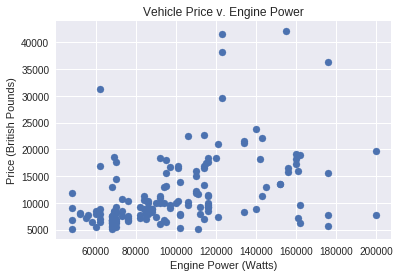

In [36]:
# Your code goes here
engine_power = auto_numeric["engine-power"].values
price = auto_numeric["price"].values
plt.scatter(engine_power, price)
plt.xlabel("Engine Power (Watts)")
plt.ylabel("Price (British Pounds)")
plt.title("Vehicle Price v. Engine Power")
plt.show()

### ========== Question 1.5  ==========
Do you think that engine-power alone is sufficient for predicting the price? Can you make any other observations on the data from the above plot? Please explain your answer in 2-3 sentences. 

A: The data shows a siginificant amount of scatter and the points do not appear to fit any standard models (perhaps logisitic but not linear, power, exponential, etc.) which means that the engine power alone is probably not sufficient for predicting the price. However, there appears to be a rough positive correlation between the two variables, which means that the engine-power, to some currently undetermined extent, could still be a useful (if not comprehensive) part of our model. Also worth noting from the above plot is the clustering towards the lower prices and engine powers; this may be because of "outliers" (i.e. skewed data) in the top and far right areas of the data (which would require further statistical analysis to confirm whether the points are in fact outliers), or because fewer high-performance, high-power, expensive engines are produced as compared to the number of lower-power engines and thus there may just be less data available.



### ========== Question 1.6  ==========
Visualise the distribution of the car prices. Choose a sensible value for the number of bins in the histogram. Again, label axes appropriately and include a title in your plot.

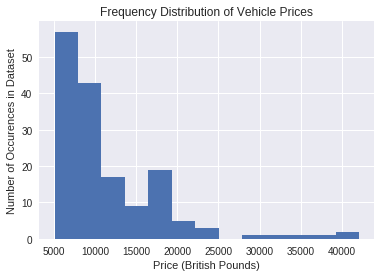

In [37]:
# Your code goes here
# I chose 13 bins because my statistics class taught that a good rule of thumb
# for number of bins is the square root of the number of data points
plt.hist(price, bins=13)
plt.xlabel("Price (British Pounds)")
plt.ylabel("Number of Occurences in Dataset")
plt.title("Frequency Distribution of Vehicle Prices")
plt.show()

### ========== Question 1.7  ==========
How would you preprocess it to improve the performance of linear regression? Don’t do it at this stage, but instead in one sentence explain why you would do what you suggested.

A: A transformation should be performed on the data so that the data is more evenly distributed over the domain of the regressor, reducing the likelihood that the linear regression model will be skewed by a few very small or, more likely, very large data points. 

### ========== Question 1.8  ==========
Now we want to build a simple linear regression model. First we need to define our input and target variables. Store the values of the attribute `engine-power` in a vector `X` and the values of our target variable `price` in a vector `y`.

In [38]:
# Your code goes here
X = auto_numeric["engine-power"]
y = auto_numeric["price"]

### ========== Question 1.9 ==========
For technical reasons, we need to convert `X` into a 2D array, otherwise we will receive an error when trying to use it for building models. Perform this transformation and confirm that the shape of the resulting array is (`n`,1) where `n` is the number of instances in the dataset. 

In [39]:
# Your code goes here
X = np.reshape(X.values, (X.shape[0],1))
print ("We expect a size of (159, 1) since there are 159 instances in the dataset.")
print ("Actual size: {}".format(X.shape))

We expect a size of (159, 1) since there are 159 instances in the dataset.
Actual size: (159, 1)


### ========== Question 1.10  ==========
Now we want to use Hold-out validation to split the dataset into training and testing subsets. Use 80% of the data for training and the remaining 20% for testing. Store your data into matrices `X_train`, `X_test`, `y_train`, `y_test`.

In [40]:
# Your code goes here
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2, random_state=1)

### ========== Question 1.11  ==========
By using Scikit-learn's [`LinearRegression`](http://scikit-learn.org/0.17/modules/generated/sklearn.linear_model.LinearRegression.html) fit a model to the training data. When initialising the model, set the `normalize` parameter to `True` and use default settings for the other parameters.

In [41]:
# Your code goes here
lm = LinearRegression(normalize=True)
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

### ========== Question 1.12  ==========
By looking into the attributes of your model, write down an equation for predicting the price of a car given the engine-power.

In [42]:
# Your code goes here
print ("For y = price in British Pounds and X = engine power in Watts,")
# I assigned the equation to a variable instead of printing in one code line because
# the variable is useful in formatting graphs later in the assignment.
equationString = "y = {:,.3f}X + {:,.2f}".format(lm.coef_[0], lm.intercept_)
print (equationString)

For y = price in British Pounds and X = engine power in Watts,
y = 0.097X + 2,457.87


### ========== Question 1.13  ==========
What happens to the price as one more unit of engine-power is added? By examining the magnitude of the regression coefficient is it possible to tell whether or not engine-power is an important influential variable on price? Explain your answer in 1-2 sentences.

A: The linear model above shows that as one more unit (Watt) of engine-power is added, the price increases by .1 units (British Pounds). If the data were normalized based on the sizes of the values in the arrays, we would see a nearly 1:1 incremental relationship which would suggest some non-arbitrary influence on the price, but without running similar analyses on the other attributes we cannot determine if the influence of engine-power on price is significant *compared to the influences of the other attributes on the price*.

### ========== Question 1.14  ==========
Produce a scatter plot similar to the one in Question 1.4 but use training data only this time. Add the regression line to the plot and show the predictions on the training set by using a different marker. Label axes appropriately and add a title to the graph. 

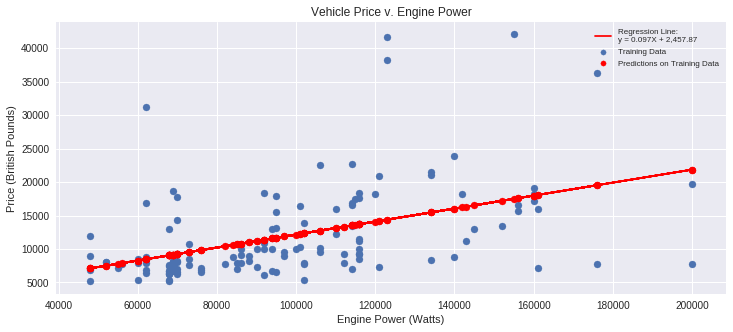

In [43]:
# Your code goes here
plt.figure(figsize=(12,5))
plt.scatter(X_train, y_train, label="Training Data")
y_pred = lm.predict(X=X_train)
plt.plot(X_train, y_pred, c="r", label="Regression Line: \n" + equationString)
plt.scatter(X_train,y_pred, c="r", label="Predictions on Training Data")
plt.xlabel("Engine Power (Watts)")
plt.ylabel("Price (British Pounds)")
plt.title("Vehicle Price v. Engine Power")
plt.legend(fontsize=8, markerscale = .75)
plt.show()

### ========== Question 1.15  ==========
So far we have used Hold-out validation. Can you think of a disadvantage of using this method, especially when dealing with small datasets?

A: Based on the input proportions, Hold-Out Validation randomly chooses one subset of the data for training and another for testing. This means that, especially with small datasets, there is a risk that the (presumably smaller) testing subset is not representative of the available data. Similarly, even if the training data is representative of future unseen data but the test subset is not representative of the available data then the model will not generalize well to unseen data. This disadvantage of Hold-Out Validation is significantly reduced by KFold validation which makes several splits so that all of the available data is used in training in testing, just not at the same time.

### ========== Question 1.16  ==========
Now we want to use [`KFold`](http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.KFold.html) cross-validation to evaluate the performance of the regression model. Famliriase yourself with the method and make sure you understand the differences between Hold-out and K-fold cross-validation. By using Scikit-learn's `K-fold` class construct a 5-fold cross-validation iterator for the `auto_numeric` dataset. Set the `shuffle` parameter to `True` and `random_state` to `0`. 

In [44]:
# Your code goes here
kf = KFold(159, n_folds=5, shuffle=True, random_state=0)

### ========== Question 1.17  ==========
By making use of the iterator you constructed in the previous question, loop through the 5 folds and display the mean value of the `price` variable for the training instances only in each fold.

In [45]:
# Your code goes here
iteration = 1
for train_index, test_index in kf:
    print ("Mean price in pounds of training set, iteration {}: {:,.2f}"\
           .format(iteration, y[train_index].mean()))
    iteration += 1

Mean price in pounds of training set, iteration 1: 11,853.27
Mean price in pounds of training set, iteration 2: 11,635.98
Mean price in pounds of training set, iteration 3: 11,689.87
Mean price in pounds of training set, iteration 4: 11,709.83
Mean price in pounds of training set, iteration 5: 11,535.84


### ========== Question 1.18  ==========
Now initialise a new `LinearRegression` model and fit it by making use of the cross-validation iterator, the `X` and `y` arrays defined above and the [`cross_val_predict`](http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.cross_val_predict.html) function. Display the shape of your prediction and confirm it has the same dimensionality as your `y` vector.

In [46]:
# Your code goes here
lm_cv = LinearRegression(normalize=True)
y_pred_cv = cross_val_predict(lm_cv, X, y=y, cv=kf)
print ("Shape of y: {}".format(y.shape))
print ("Shape of predictions: {}".format(y_pred_cv.shape))

Shape of y: (159,)
Shape of predictions: (159,)


### ========== Question 1.19  ==========
Report the Coefficient of Determination (R^2), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Correlation Coefficient (CC) from the simple linear regression model you build in Question 1.18. *Hint: RMSE is the square root of the Mean Squared Error (MSE). For CC you might find numpy's [`corrcoef`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html) function useful.* 

In [47]:
# Your code goes here
R2 = r2_score(y_true=y, y_pred=y_pred_cv)
print ("R^2 value = {:,.3f}".format(R2))
MSE = mean_squared_error(y_true=y, y_pred=y_pred_cv)
print ("Root Mean Squared Error (RMSE) = {:,.2f}".format(sqrt(MSE)))
print ("Mean Absolute Error (MAE) = {:,.2f}".format(mean_absolute_error(y_true=y, y_pred=y_pred_cv)))
print ("Correlation Coefficient from corrcoef = {:,.3f}".format(np.corrcoef(y, y_pred_cv)[1,0]))

R^2 value = 0.173
Root Mean Squared Error (RMSE) = 6,114.45
Mean Absolute Error (MAE) = 3,987.96
Correlation Coefficient from corrcoef = 0.417


### ========== Question 1.20  ==========
What do the above metrics intend to measure? Relate the values of CC, MAE and RMSE to the observations you made in Question 1.5. Explain your answer in 1-2 short paragraphs.

A: The Correlation Coefficient indicates strength of linear dependence. The fact that it is positive suggests a rough positive correlation rather than a negative one; i.e. that price generally increases as engine-power increases, which also intuitively makes sense. The fact that the value of 0.17 is so close to 0 means essentially that the data was very scattered and thus the independent variable (engine power) is probably not a good predictor by itself because the linear dependence of that single variable is weak. A weak positive correlation is exactly what was predicted by the visually scattered data in Q1.5.

Root Mean Squared Error (RMSE) is an estimate of the average deviation from the true values. The RMSE of about 6000 that we calculated means that the predicted price values were approximately £6000 off of the true values. This is a significant amount given that several of the real prices were less than £6000. This measure was likely very skewed by what are potentially outlier data points with high prices and engine powers. The Mean Absolute Error (MAE) gives us similar information but is less sensitive to outliers. The fact that MAE is still so large (£4000) confirms that the fit is a poor one.

### ========== Question 1.21 ==========
Show a histogram of the residuals of the linear regression model (i.e. true - predicted values). Label axes appropriately and add a title to your plot. Does the distribution of residuals look like what you expected?

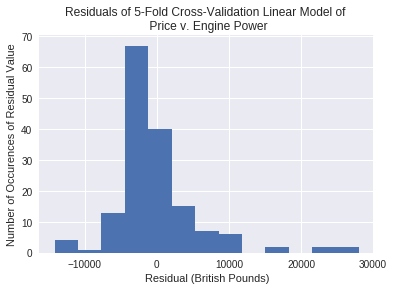

In [48]:
# Your code goes here
plt.hist(y - y_pred_cv, bins=13)
plt.xlabel("Residual (British Pounds)")
plt.ylabel("Number of Occurences of Residual Value")
plt.title("Residuals of 5-Fold Cross-Validation Linear Model of \n Price v. Engine Power")
plt.show()

A: The shape of this residual plot can be very easily inferred from the scatter plot in Q1.14. The wide scatter with a dense portion of data in 50000 < x < 100000 and 5000 < y < 10000 explains the mean just left (negative) of zero. The few data points with residuals greater >10000 and < -10000 are explained by the data points with x>150000 and y>25000 in the Q1.14 plot.

### ========== Question 1.22 ==========
Load the new dataset `train_auto_base.csv` into a pandas DataFrame `auto_base`. Again by using the `engine-power` attribute as predictor and `price` as target variable build a LinearRegression model on this dataset. Report the R^2, RMSE, MAE and CC metrics for this model by making use of the K-fold CV iterator constructed in Question 1.16.

In [49]:
# Your code goes here
data_path_base = os.path.join(os.getcwd(), 'datasets', 'train_auto_base.csv')
auto_base = pd.read_csv(data_path_base, delimiter = ',')
X_base = auto_base["engine-power"]
X_base = np.reshape(X_base.values, (X_base.shape[0],1))
y_base = auto_base["price"]
lm_cv_base = LinearRegression(normalize=True)
y_pred_base = cross_val_predict(lm_cv_base, X_base, y=y_base, cv=kf)
# Metrics
R2_base = r2_score(y_true=y_base, y_pred=y_pred_base)
print ("R^2 value = {:,.4f}".format(R2_base))
MSE_base = mean_squared_error(y_true=y_base, y_pred=y_pred_base)
print ("Root Mean Squared Error (RMSE) = {:,.2f}".format(sqrt(MSE_base)))
print ("Mean Absolute Error (MAE) = {:,.2f}".format(mean_absolute_error(y_true=y_base, y_pred=y_pred_base)))
print ("Correlation Coefficient from corrcoef = {:,.3f}".format(np.corrcoef(y_base, y_pred_base)[1,0]))


R^2 value = -0.0021
Root Mean Squared Error (RMSE) = 6,730.84
Mean Absolute Error (MAE) = 4,901.86
Correlation Coefficient from corrcoef = -0.062


### ========== Question 1.23 ==========
Show a scatter plot of predicted vs. true price and another one of predicted price vs. engine-power. Use a single plot with two subplots. Label axes appropriately.

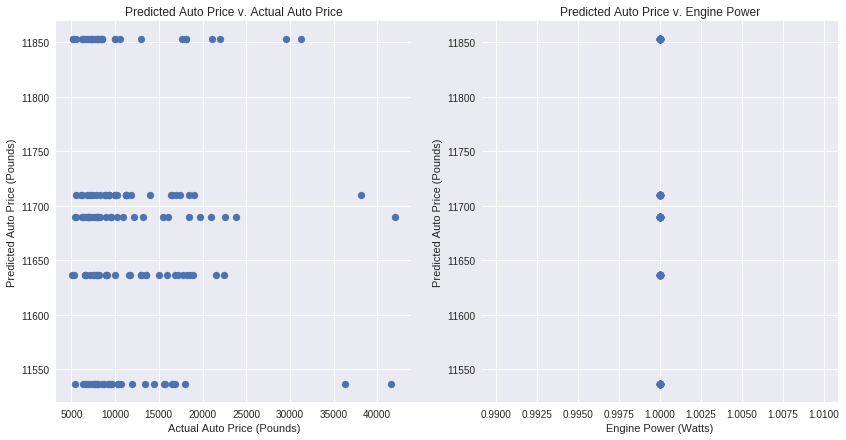

In [50]:
# Your code goes here
f, ax = plt.subplots(figsize = (14,7))
plt.xticks([])
plt.yticks([])

ax1 = f.add_subplot(1,2,1)
ax1.scatter(y_base, y_pred_base)
ax1.set_title("Predicted Auto Price v. Actual Auto Price")
ax1.set_xlabel("Actual Auto Price (Pounds)")
ax1.set_ylabel("Predicted Auto Price (Pounds)")

ax2 = f.add_subplot(1,2,2)
ax2.scatter(X_base, y_pred_base)
ax2.set_title("Predicted Auto Price v. Engine Power")
ax2.set_xlabel("Engine Power (Watts)")
ax2.set_ylabel("Predicted Auto Price (Pounds)")

plt.show()

### ========== Question 1.24 ==========
What is the simplest baseline model for the purposes of regression? Relate your answer to the regression model you have just built as part of this question. Can the predictions of this model be justified given the procedure you followed to train it?

A: Given a single regressor, the simplest estimate for the target value is the mean of the regressors. Because the regressor in the auto_train_base dataset only had one value (1.0), the regression model had no information about how the target values varied with the regressor and was thus forced (i.e. justified) to use the simplest predictions: the means as calculated in Q1.17, with each of the 5 values corresponding to one of the folds of the 5-fold cross-validation. Each of these 5 estimates can be interpreted as a point on the right plot above and a row of points on the left plot above.

### ========== Question 1.25 ==========
Why do you think this model performs so poorly? (*Hint: Justify your answer by displaying some statistics of the `auto_base` dataset.*)

In [51]:
# Your code goes here
auto_base.describe()

,engine-power,price
count,159.0,159.000000
mean,1.0,11684.723270
std,0.0,6744.910579
min,1.0,5118.000000
25%,1.0,7372.000000
50%,1.0,9233.000000
75%,1.0,14719.500000
max,1.0,42056.000000


A: As explained in 1.24, the engine-power mean of 1 and standard deviation of 0, as well as the max and min both being 1, described a data set with an invariate independent variable, thus giving no information about how the dependent variable might react to perturbuations of the independent variable. The Linear Regression classifier was forced to predict only the baseline estimates.

## 2. Multivariate Linear Regression [50%]
In this Section we will fit a Multivariate Linear Regression model (LinearRegression) to the dataset. In contrast to Part 1, we will now train a model with multiple explanatory variables and ascertain how they affect our ability to predict the retail price of a car. One of our foremost concerns will be to determine exactly which attributes to include in the model and which may be left out.

### ========== Question 2.1 ==========
Use the original dataset (`auto_numeric`) and a visualisation tool of your choice to examine whether or not any of the other attributes are particularly good at predicting the price. Can you find any? Do any attributes appear useless at predicting the price? Do any attributes exhibit significant correlations? As you answer these questions, list two attributes for each question but do not modify the dataset at this stage. Of the attributes you listed, which ones could you safely remove? Explain in 4-5 sentences. *Hint: you might find seaborn's [`pairplot`](https://seaborn.github.io/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot) function useful for this question.*

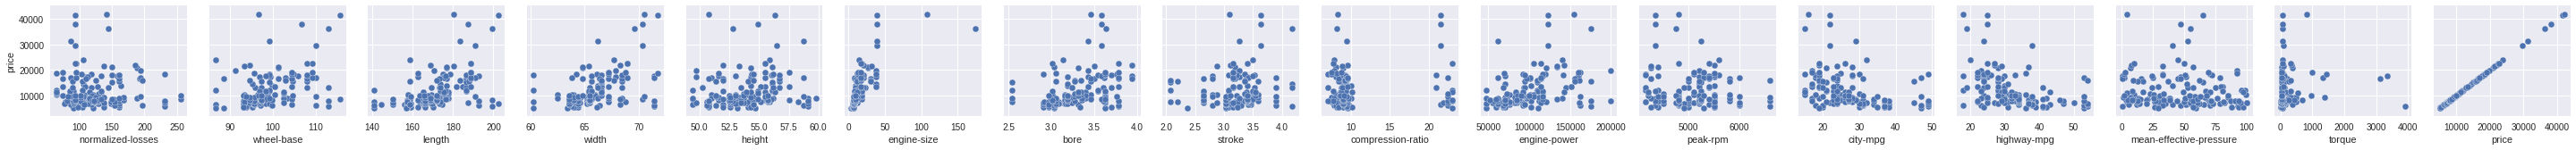

In [52]:
# Your code goes here
sns.pairplot(data=auto_numeric, x_vars=auto_numeric.columns, y_vars="price")
plt.show()

A: I apologize for the plots being difficult to read, but we are most interested in the shape of the above graphs. Each plot has a different attribute on its xaxis (except the rightmost, which has the target values), and the yaxis for all of the plots is the price. The most useless seem to be mean-effective-pressure (third from the right) and height (fifth from the left) because of the degree of scatter. These seem most likely to have a correlation coefficient of 0 and I would be most inclined to remove these. I would also consider removing the torque (second from the right) for fear that it would cause the same problems as viewed in the right subplot of Q1.23. Engine-size (sixth from the left) seems to show the strongest correlation, but height (third from the left) and width (fourth from the left) also show some positive correlatoin while city-mpg (fifth from the right) and highway-mpg (fourth from the right seem to show some negative correlation despite my intuition that a larger mpgs would be more expensive rather than less expensive.

### ========== Question 2.2 ==========
We will now make a first attempt at building a Multivariate Linear Regression model using all numeric attributes. Initialise a `LinearRegression` model and predict the output by using 5-fold cross-validation and the `cross_val_predict` function.

In [53]:
# Your code goes here
lm_cv = LinearRegression(normalize=True)
X_mv = auto_numeric.drop(['price'], axis=1)
y_mv = auto_numeric['price']
y_pred_mv = cross_val_predict(lm_cv, X_mv, y=y_mv, cv=kf)

### ========== Question 2.3 ==========
Display the Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Correlation Coefficient (CC).

In [54]:
# Your code goes here
R2_mv = r2_score(y_true=y_mv, y_pred=y_pred_mv)
print ("R^2 value = {:,.3f}".format(R2_mv))
MSE_mv = mean_squared_error(y_true=y_mv, y_pred=y_pred_mv)
print ("Root Mean Squared Error (RMSE) = {:,.2f}".format(sqrt(MSE_mv)))
print ("Mean Absolute Error (MAE) = {:,.2f}".format(mean_absolute_error(y_true=y_mv, y_pred=y_pred_mv)))
print ("Correlation Coefficient from corrcoef = {:,.3f}".format(np.corrcoef(y_mv, y_pred_mv)[1,0]))

R^2 value = 0.486
Root Mean Squared Error (RMSE) = 4,819.80
Mean Absolute Error (MAE) = 3,050.34
Correlation Coefficient from corrcoef = 0.743


### ========== Question 2.4 ==========
 Comment on each metric display above in comparison to what you have obtained for the Simple Linear Regression model in Question 1.19.

A: The R^2 and CC values have both increased significantly from the univariate model in 1.19, suggesting a much better fit. Similarly, the RMSE and MAE values have decreased, indicating a smaller difference (error) between the predicted values and the true values, ergo a better fit. The spread betewen the RMSE and MAE suggests that a few outliers (or very skewed data) are still compromising the accuracy of the fit.

### ========== Question 2.5 ==========
Examine the histogram for the `engine-size` attribute. Choose a sensible value for the number of bins in the histogram. Label axes appropriately and include a title in your plot.

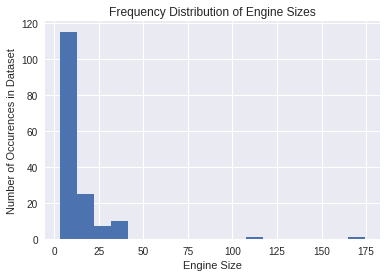

In [55]:
# Your code goes here
# As explained above I would usually use ~13 bins but 18 fit nicely given
# the max engine size of ~180
plt.hist(auto_numeric["engine-size"], bins=18)
plt.xlabel("Engine Size")
plt.ylabel("Number of Occurences in Dataset")
plt.title("Frequency Distribution of Engine Sizes")
plt.show()

### ========== Question 2.6 ==========
Is the distribution expected to cause a problem for regression? Explain your answer in 2-3 sentences.

A: Linear Regression in its most basic form (i.e. the Linear Regression that we used in 2.2) only accurately predicts output values if there is a somewhat linear relationship between the regressors and the output value. Assuming that embarrassing outliers have already been removed in the preprocessing, the extremely right-skewed distribution above suggests a non-linear relationship between engine sizes and price. Without some kind of additional transformation (e.g. log), a pure linear regression will probably do a poor job of predicting values.

### ========== Question 2.7 ==========
Transform this attribute using an appropriate simple technique from the lectures. Plot the histogram of the transformed attribute.

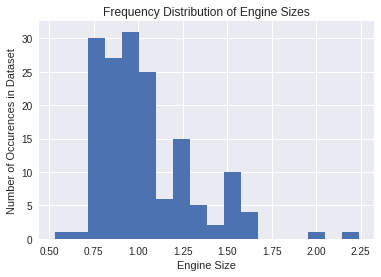

In [56]:
# Your code goes here
for i in range (auto_numeric["engine-size"].shape[0]):
    elt = auto_numeric["engine-size"][i]
    # I chose base 10 because it somewhat subjectively seemed to give a better distribution than base 2 and natural log
    elt = log(elt, 10)
    auto_numeric["engine-size"][i] = elt
plt.hist(auto_numeric["engine-size"], bins=18)
plt.xlabel("Engine Size")
plt.ylabel("Number of Occurences in Dataset")
plt.title("Frequency Distribution of Engine Sizes")
plt.show()

### ========== Question 2.8 ==========
Now re-build a Linear Regression model on the transformed dataset and report the R^2, RMSE, MAE and CC metrics.

In [57]:
# Your code goes here
# Same code as Q2.2/2.3
lm_cv = LinearRegression(normalize=True)
X_mv = auto_numeric.drop(['price'], axis=1)
y_mv = auto_numeric['price']
y_pred_mv = cross_val_predict(lm_cv, X_mv, y=y_mv, cv=kf)
R2_mv = r2_score(y_true=y_mv, y_pred=y_pred_mv)
print ("R^2 value = {:,.3f}".format(R2_mv))
MSE_mv = mean_squared_error(y_true=y_mv, y_pred=y_pred_mv)
print ("Root Mean Squared Error (RMSE) = {:,.2f}".format(sqrt(MSE_mv)))
print ("Mean Absolute Error (MAE) = {:,.2f}".format(mean_absolute_error(y_true=y_mv, y_pred=y_pred_mv)))
print ("Correlation Coefficient from corrcoef = {:,.3f}".format(np.corrcoef(y_mv, y_pred_mv)[1,0]))

R^2 value = 0.690
Root Mean Squared Error (RMSE) = 3,745.92
Mean Absolute Error (MAE) = 2,668.36
Correlation Coefficient from corrcoef = 0.832


### ========== Question 2.9 ==========
How has the performance of your model changed? Explain your answer in 1-2 sentences.

A: All metrics show improved fit: R^2 and CC have both increased suggesting a stronger linearity of the model. RMSE and MAE have both decreased, meaning a smaller average error of predictions, and the interval between the two has decreased suggesting data that is better distributed for a linear regression.

### ========== Question 2.10 ==========
So far we have performed regression with numeric attributes. We will now attempt to integrate nominal (categorical) attributes into our regression model. 
Load the dataset `train_auto_full.csv` into a pandas DataFrame called `auto_full`. Display the number of samples and attributes in the dataset. Also, display the first 20 instances of the dataset. *Hint: Execute the cell below to change the default for `max_columns` display option in pandas.*

In [58]:
pd.set_option('max_columns', 30)

In [59]:
# Your code goes here
data_path_full = os.path.join(os.getcwd(), 'datasets', 'train_auto_full.csv')
auto_full = pd.read_csv(data_path_full, delimiter = ',')
print ("Total number of datapoints: {}".format(auto_full.shape[0]))
print ("Total number of attributes: {}".format(auto_full.shape[1]-1))
auto_full.head(20)

Total number of datapoints: 159
Total number of attributes: 26


,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,symboling,mean-effective-pressure,torque,price
0,164.0,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,ohc,4,8.85,mpfi,3.19,3.40,10.00,102000.0,5500.0,24.0,30.0,2,40.52,57.68,13950.0
1,110.0,audi,gas,std,4,sedan,4wd,front,99.4,162.4,66.4,54.3,ohc,5,15.18,mpfi,3.19,3.40,8.00,115000.0,5500.0,18.0,22.0,2,47.39,59.59,17450.0
2,158.0,audi,gas,std,4,sedan,fwd,front,105.8,192.7,71.4,51.6,ohc,5,15.18,mpfi,3.94,2.80,8.50,70000.0,4400.0,28.0,30.0,1,0.85,3344.79,17710.0
3,106.0,audi,gas,turbo,4,sedan,fwd,front,86.6,158.7,67.7,55.9,ohc,5,13.74,mpfi,3.13,3.50,7.80,140000.0,5600.0,32.0,20.0,1,44.74,68.97,23875.0
4,192.0,bmw,gas,std,2,sedan,rwd,front,101.2,176.8,64.8,54.3,ohc,4,8.67,mpfi,3.50,2.80,8.80,101000.0,5800.0,23.0,29.0,2,44.78,53.48,16430.0
5,194.0,bmw,gas,std,4,sedan,rwd,front,110.0,190.9,71.4,58.7,ohc,4,8.67,mpfi,3.78,3.90,22.50,101000.0,6000.0,47.0,53.0,0,1.80,1330.28,16925.0
6,188.0,bmw,gas,std,2,sedan,rwd,front,101.2,176.8,64.8,54.3,ohc,6,26.58,mpfi,3.31,3.19,9.00,121000.0,4250.0,21.0,28.0,0,7.19,377.06,20970.0
7,150.0,bmw,gas,std,4,sedan,rwd,front,101.2,176.8,64.8,56.1,ohc,6,26.58,mpfi,3.03,3.19,8.00,134000.0,4400.0,28.0,37.0,0,57.37,48.20,21105.0
8,121.0,chevrolet,gas,std,2,hatchback,fwd,front,88.4,141.1,60.3,53.2,l,3,3.39,2bbl,3.03,3.03,9.50,48000.0,5300.0,47.0,53.0,2,59.33,25.08,5151.0
9,98.0,chevrolet,gas,std,2,hatchback,fwd,front,104.3,155.9,68.3,52.0,ohc,4,6.05,2bbl,3.31,3.47,7.80,70000.0,5000.0,34.0,34.0,1,51.55,36.35,6295.0


### ========== Question 2.11 ==========
This dataset contains a mixture of numeric and nominal attributes. Name the variables that you think are categorical. Why can we not use the nominal attributes in their current form for the purposes of regression? 

A: Categorical attributes: make, fuel-type, aspiration, body-style, drive-wheels, engine-location, engine-type, fuel-system. These values are not ordered, so besides equality testing, operating on them mathematically as happens in linear regression carries no meaning. 

### ========== Question 2.12 ==========
Now we want to convert the categorical variables by using [One-Hot-Encoding](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder). Familiriase yourself with the class. One limitation with this module is that it can deal only with categorical attributes in integer format (remember that in our example we have attributes in string format). 

Copy the `auto_full` dataframe into a new dataframe `auto_full_edit` and transform the categorical variables by using [Label Encoding](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.LabelEncoder.html). Then transform again the categorical variables by using One-Hot-Encoding. Make sure you don't transform the continuous variables. *Hint: make appropriate use of the `categorical_features` parameter in [`OneHotEncoder`](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder).*

Store the transformed attributes into a numpy array `X_enc` and display its dimensionality.  


In [60]:
# Your code goes here
auto_full_edit = auto_full.copy(deep=True)
categorical_labels = ["make", "fuel-type", "aspiration", "body-style", "drive-wheels", \
                      "engine-location", "engine-type", "fuel-system"]
for att in categorical_labels:
    le = LabelEncoder()
    le.fit(auto_full_edit[att])
    auto_full_edit[att] = le.transform(auto_full_edit[att])
X_enc = auto_full_edit.drop("price", axis=1).as_matrix()
ohe = OneHotEncoder(categorical_features=[1,2,3,4,5,7,12,15])
ohe.fit(X_enc)
X_enc = ohe.transform(X_enc)
print ("Shape of X_enc: {}".format(X_enc.shape))

Shape of X_enc: (159, 59)


### ========== Question 2.13 ==========
By using the transformed data train a multivariate linear regression model and by using 5-fold cross-validation report the R^2, RMSE, MAE and CC metrics.

In [61]:
# Your code goes here
# Same code as in 2.8 but with X_enc in cross_val_predict
lm_cv = LinearRegression(normalize=True)
y_mv = auto_full['price']
y_pred_mv = cross_val_predict(lm_cv, X_enc, y=y_mv, cv=kf)
R2_mv = r2_score(y_true=y_mv, y_pred=y_pred_mv)
print ("R^2 value = {:,.3f}".format(R2_mv))
MSE_mv = mean_squared_error(y_true=y_mv, y_pred=y_pred_mv)
print ("Root Mean Squared Error (RMSE) = {:,.2f}".format(sqrt(MSE_mv)))
print ("Mean Absolute Error (MAE) = {:,.2f}".format(mean_absolute_error(y_true=y_mv, y_pred=y_pred_mv)))
print ("Correlation Coefficient from corrcoef = {:,.3f}".format(np.corrcoef(y_mv, y_pred_mv)[1,0]))

R^2 value = 0.827
Root Mean Squared Error (RMSE) = 2,795.01
Mean Absolute Error (MAE) = 1,815.12
Correlation Coefficient from corrcoef = 0.915


### ========== Question 2.14 ==========
How does this more complex model perform with respect to your best performing model from either question 2.3 or 2.8? List one advantage and one disadvantage of using the more complex model.

A: The more complex model has stronger linearity and lower average erros, as demonstrated by higher R^2 and CC values and lower RMSE and MAE values. This is the strongest advantageof the more complex model: it considers more of the training data so as long as it doesn't overfit the model will likely better predict unseen values. Besides additional computational requirements, the main disadvantage of multivariate regression is how easy the results are to explain. With a single regressor, even a transformed one, the logic is easy to follow -- a similar advantage that decision trees show. With a multivariate linear model, there are dangers of multicollinearity. For statistical reasons that I don't think it necessary to detail here, the weight on an individual regressor (attribute) does not actually represent that regressor's independent relationship with the target, which makes the full model difficult to explain and interpret in a way that is not strictly mathematical.

### ========== Question 2.15 ==========
Finally, experiment with tree-based regressors (e.g. [`DecisionTreeRegressor`](http://scikit-learn.org/0.17/modules/generated/sklearn.tree.DecisionTreeRegressor.html), [`RandomForestRegressor`](http://scikit-learn.org/0.17/modules/generated/sklearn.ensemble.RandomForestRegressor.html)) and report 5-fold cross-validation scores for R^2, RMSE, MAE and CC. Has your performance improved? Explain your answer in 1-2 sentences.

In [62]:
# Your code goes here
dt = DecisionTreeRegressor(max_depth=5, random_state=1)
dt.fit(X_enc, y_mv)
y_pred_mv = cross_val_predict(dt, X_enc, y=y_mv, cv=kf)
print ("DECISION TREE REGRESSOR: ")
R2_mv = r2_score(y_true=y_mv, y_pred=y_pred_mv)
print ("R^2 value = {:,.3f}".format(R2_mv))
MSE_mv = mean_squared_error(y_true=y_mv, y_pred=y_pred_mv)
print ("Root Mean Squared Error (RMSE) = {:,.2f}".format(sqrt(MSE_mv)))
print ("Mean Absolute Error (MAE) = {:,.2f}".format(mean_absolute_error(y_true=y_mv, y_pred=y_pred_mv)))
print ("Correlation Coefficient from corrcoef = {:,.3f}".format(np.corrcoef(y_mv, y_pred_mv)[1,0]))

print()

rf = RandomForestRegressor(n_estimators=10, max_depth=5, random_state=1)
rf.fit(X_enc, y_mv)
y_pred_mv = cross_val_predict(rf, X_enc, y=y_mv, cv=kf)
print ("RANDOM FOREST REGRESSOR: ")
R2_mv = r2_score(y_true=y_mv, y_pred=y_pred_mv)
print ("R^2 value = {:,.3f}".format(R2_mv))
MSE_mv = mean_squared_error(y_true=y_mv, y_pred=y_pred_mv)
print ("Root Mean Squared Error (RMSE) = {:,.2f}".format(sqrt(MSE_mv)))
print ("Mean Absolute Error (MAE) = {:,.2f}".format(mean_absolute_error(y_true=y_mv, y_pred=y_pred_mv)))
print ("Correlation Coefficient from corrcoef = {:,.3f}".format(np.corrcoef(y_mv, y_pred_mv)[1,0]))

DECISION TREE REGRESSOR: 
R^2 value = 0.731
Root Mean Squared Error (RMSE) = 3,488.44
Mean Absolute Error (MAE) = 2,133.01
Correlation Coefficient from corrcoef = 0.859

RANDOM FOREST REGRESSOR: 
R^2 value = 0.815
Root Mean Squared Error (RMSE) = 2,888.98
Mean Absolute Error (MAE) = 1,901.33
Correlation Coefficient from corrcoef = 0.907


A: The Tree and Forest Regressors outperform the univariate regression (even after the log transformation) but while the Forest Regressor gets very close it does not quite reach the performance of the Multivariate Regressor. 